# 购物篮词云分析

In [1]:
import pandas as pd
# 数据加载
data = pd.read_csv('Market_Basket_Optimisation.csv',header=None)
transactions=[]
item_count={}
for i in range(data.shape[0]):
    temp=[]
    for j in range(data.shape[1]):
        item=str(data.values[i,j])
        if item !='nan':
            temp.append(item)
            if item not in item_count:
                item_count[item]=1
            else:
                item_count[item]+=1
        transactions.append(temp)
#print(transactions)                    

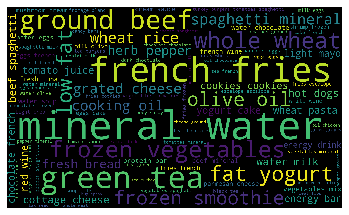

In [5]:
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
#数据处理，并绘制词云
def remove_stop_words(f):
    stop_words=['[',']']
    for stop_word in stop_words:
        f=f.replace(stop_word,'')
    return f
def create_word_cloud(f):
    f=remove_stop_words(f)
    cut_text=word_tokenize(f)
    cut_text=" ".join(cut_text)
    wc=WordCloud(
        max_words=100,
        width=2000,
        height=1200,
    )
    wordcloud=wc.generate(cut_text)
    wordcloud.to_file('wordcloud.jpg')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
all_word=' '.join('%s' %item for item in transactions)
create_word_cloud(all_word)

In [3]:
#获取前10词云
top_words=sorted(item_count.items(),key=lambda x:x[1],reverse=True)
print(top_words[0:10])

[('mineral water', 1788), ('eggs', 1348), ('spaghetti', 1306), ('french fries', 1282), ('chocolate', 1230), ('green tea', 991), ('milk', 972), ('ground beef', 737), ('frozen vegetables', 715), ('pancakes', 713)]


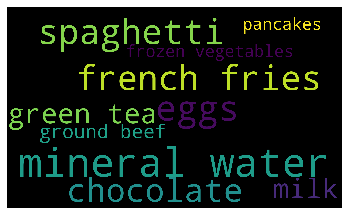

In [4]:
#绘制前10词云
top_word_list={}
for i in range(0,10):
    top_word_list[top_words[i][0]]=top_words[i][1]
wc=WordCloud(
    max_words=100,
    width=2000,
    height=1200,
)    
wordcloud=wc.generate_from_frequencies(top_word_list)
wordcloud.to_file('wordcloud_top10.jpg')
plt.imshow(wordcloud)
plt.axis("off")
plt.show()